<p> This script will plot the cumulative area distribution for:
<ul>
    <li> our experimental data </li>
    <li> literature data </li>
    <li> our simulation data </li>
        <ul> 
            <li> varying breaking strain $\epsilon_b$</li>
            <li> varying profile $m$ </li>
        </ul>    
</ul>    

Original Data: 06/06/2025<br>
Modified on: 16/06/2025<br>
Modifications commited:
</p>


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Use custom mplstyle file for plotting

In [2]:
mplstyle_file = r'C:\Users\vinee\OneDrive\Documents\vscode\stressed network model\article_preprint.mplstyle'
plt.style.use(f'{mplstyle_file}')

Define fitting function. Here we define exponential fitting fuction
Inline: $y = a\exp{(-bA)}$

In [3]:
def exp_fit(x, a, b):
    return a*np.exp(b*x)

Let's read simulation data first. Note that the individual exponential fitting of cumulative area of the fragments have already been estimated and saved in pickle file named "exp_cum_area" for all the simualtion. Therefore, navigate to the data folder of the simulationd data and make sure to provide correct directory path to access this file. <br>
We have provided the data for varying breaking strain $\epsilon_b$ below:

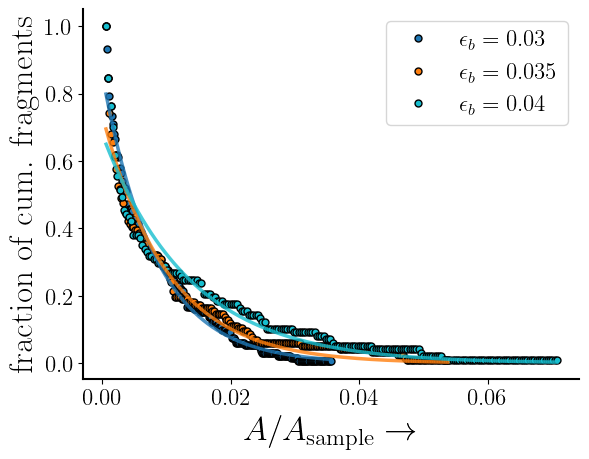

In [4]:
filename = r'exp_cum_area'

data_dir_path = r'C:\MyData\Stressed network work\Data\hole5_d5t125_et03_dec_m5_R108_e02_254X220\area_data'
with open(data_dir_path + f'/{filename}', 'rb') as f:
    cum_area_e1, cum_count_e1, p_e1, _ = pickle.load(f)    # the last variable stores covariance which we don't need


data_dir_path = r'C:\MyData\Stressed network work\Data\m5et\hole5_d5t125_et035_dec_m5_R108_e02_254X220\area_data'
with open(data_dir_path + f'/{filename}', 'rb') as f:
    cum_area_e2, cum_count_e2, p_e2, _ = pickle.load(f)

data_dir_path = r'C:\MyData\Stressed network work\Data\m5et\hole5_d5t125_et04_dec_m5_R108_e02_254X220\area_data'
with open(data_dir_path + f'/{filename}', 'rb') as f:
    cum_area_e3, cum_count_e3, p_e3, _ = pickle.load(f)

# We can separately plot and check the data
fig, ax = plt.subplots()
A_num = 60*60   # non-dimensional by total area of the network
ax.plot(cum_area_e1/A_num, cum_count_e1/cum_count_e1[0], linestyle = 'none', markersize = 5, marker = 'o', color='tab:blue', label = r'$\epsilon_b = 0.03$', markeredgecolor='black')
ax.plot(cum_area_e2/A_num, cum_count_e2/cum_count_e2[0], linestyle = 'none', markersize = 5, marker = 'o', color='tab:orange', label = r'$\epsilon_b = 0.035$', markeredgecolor='black')
ax.plot(cum_area_e3/A_num, cum_count_e3/cum_count_e3[0], linestyle = 'none', markersize = 5, marker = 'o', color='tab:cyan', label = r'$\epsilon_b = 0.04$', markeredgecolor='black')
ax.plot(cum_area_e1/A_num, exp_fit(cum_area_e1, p_e1[0], p_e1[1]), color='tab:blue', alpha = 0.8)
ax.plot(cum_area_e2/A_num, exp_fit(cum_area_e2, p_e2[0], p_e2[1]), color='tab:orange', alpha = 0.8)
ax.plot(cum_area_e3/A_num, exp_fit(cum_area_e3, p_e3[0], p_e3[1]), color='tab:cyan', alpha = 0.8)
ax.set_xlabel(r'$A/A_{\rm{sample}}\rightarrow$')
ax.set_ylabel(r'fraction of cum. fragments')
ax.legend()
# fig.savefig(r'C:\MyData\Stressed network work\Data\m5et'+ '/collated_cum_area_vary_e_and_literature.png', dpi=300, bbox_inches='tight')
plt.show()

Similarly, we can read the cumulative area data for varying profile (that is varying $m$) as shown below:

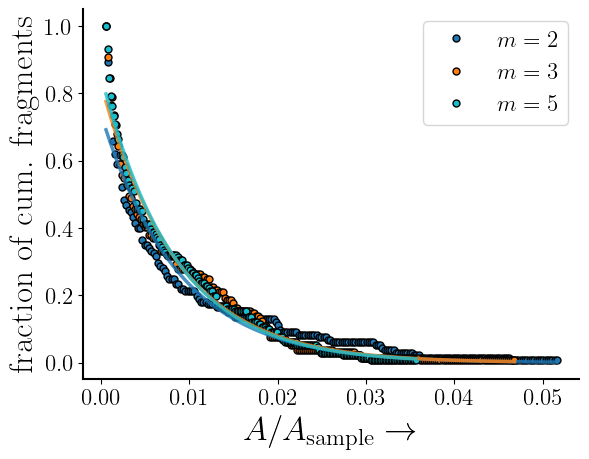

In [5]:
filename = r'exp_cum_area'

data_dir_path = r'C:\MyData\Stressed network work\Data\hole5_d5t125_et03_dec_m2_R108_e02_254X220\area_data'
with open(data_dir_path + f'/{filename}', 'rb') as f:
    cum_area_m2, cum_count_m2, p_m2, _ = pickle.load(f)


data_dir_path = r'C:\MyData\Stressed network work\Data\hole5_d5t125_et03_dec_m3_R108_e02_220X254\area_data'
with open(data_dir_path + f'/{filename}', 'rb') as f:
    cum_area_m3, cum_count_m3, p_m3, _ = pickle.load(f)

data_dir_path = r'C:\MyData\Stressed network work\Data\hole5_d5t125_et03_dec_m5_R108_e02_254X220\area_data'
with open(data_dir_path + f'/{filename}', 'rb') as f:
    cum_area_m5, cum_count_m5, p_m5, _ = pickle.load(f)

# We can separately plot and check the data
fig, ax = plt.subplots()
A_num = 60*60   # non-dimensional by total area of the network
ax.plot(cum_area_m2/A_num, cum_count_m2/cum_count_m2[0], linestyle = 'none', markersize = 5, marker = 'o', color='tab:blue', label = r'$m = 2$', markeredgecolor='black')
ax.plot(cum_area_m3/A_num, cum_count_m3/cum_count_m3[0], linestyle = 'none', markersize = 5, marker = 'o', color='tab:orange', label = r'$m = 3$', markeredgecolor='black')
ax.plot(cum_area_m5/A_num, cum_count_m5/cum_count_m5[0], linestyle = 'none', markersize = 5, marker = 'o', color='tab:cyan', label = r'$m = 5$', markeredgecolor='black')
ax.plot(cum_area_m2/A_num, exp_fit(cum_area_m2, p_m2[0], p_m2[1]), color='tab:blue', alpha = 0.8)
ax.plot(cum_area_m3/A_num, exp_fit(cum_area_m3, p_m3[0], p_m3[1]), color='tab:orange', alpha = 0.8)
ax.plot(cum_area_m5/A_num, exp_fit(cum_area_m5, p_m5[0], p_m5[1]), color='tab:cyan', alpha = 0.8)
ax.set_xlabel(r'$A/A_{\rm{sample}}\rightarrow$')
ax.set_ylabel(r'fraction of cum. fragments')
ax.legend()
# fig.savefig(r'C:\MyData\Stressed network work\Data\m5et'+ '/collated_num_cum_area_vary_m.png', dpi=300, bbox_inches='tight')
plt.show()

Now, we read the our experimental data. The cumulative area fragment has been already computed and stored in the <test_name>_area_exp_cum_area.mat file. However, we need to perform exponential fitting for this case. Since, we have peformed 3 test for impact velocity of $v = 20$ m/s and $v= 34$ m/s, therefore, we need to average the values and overplot error bars on it. We will separately plot it to check our ploting here in this block.

Fit parameters for v = 34: [ 1.10242179 -0.07622766], [[ 9.63972644e-05 -6.66191830e-06]
 [-6.66191830e-06  9.95487279e-07]]
Fit parameters for v = 20: [ 1.11705489 -0.06372914], [[ 1.14592369e-04 -6.56541991e-06]
 [-6.56541991e-06  7.99978289e-07]]


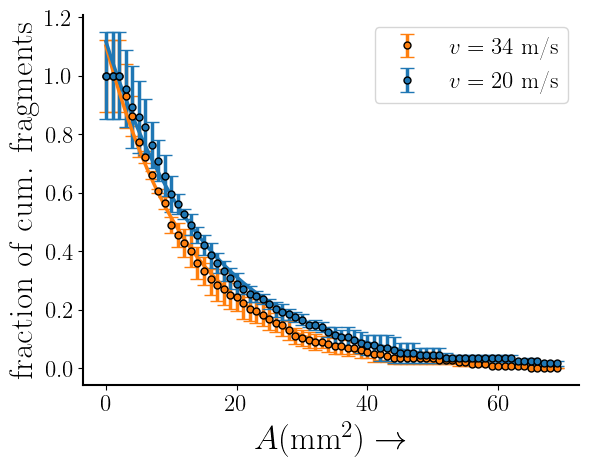

In [6]:
# For v = 34
data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\Test1\analysis'
with open(data_dir_path + f'/test1_area_exp_cum_area', 'rb') as f:
    cum_area1, cum_count1, p1, p_conv1, area1 = pickle.load(f)

data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\Test2\analysis'
with open(data_dir_path + f'/test2_area_exp_cum_area', 'rb') as f:
    cum_area2, cum_count2, p2, p_conv2, area2 = pickle.load(f)

data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\Test3\analysis'
with open(data_dir_path + f'/test3_area_exp_cum_area', 'rb') as f:
    cum_area3, cum_count3, p3, p_conv3, area3 = pickle.load(f)

# For v = 20
data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\Test6\analysis'
with open(data_dir_path + f'/test6_area_exp_cum_area', 'rb') as f:
    cum_area6, cum_count6, p6, p_conv6, area6 = pickle.load(f)

data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\Test7\analysis'
with open(data_dir_path + f'/test7_area_exp_cum_area', 'rb') as f:
    cum_area7, cum_count7, p7, p_conv7, area7 = pickle.load(f)

data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\Test8\analysis'
with open(data_dir_path + f'/test8_area_exp_cum_area', 'rb') as f:
    cum_area8, cum_count8, p8, p_conv8, area8 = pickle.load(f)

# find average of (1,2,3)
min_area = min([min(area1), min(area2), min(area3)])
max_area = max([max(area1), max(area2), max(area3)])

cum_area123 = np.arange(0, 70, 1)
cum_count123 = np.zeros_like(cum_area123)
cum_count123_std = np.zeros_like(cum_area123)
for i in range(len(cum_area123)):
    count1 = len([s for s in area1 if s >= cum_area123[i]])
    count2 = len([s for s in area2 if s >= cum_area123[i]])
    count3 = len([s for s in area3 if s >= cum_area123[i]])
    cum_count123[i] = (count1 + count2 + count3)/3
    cum_count123_std[i] = np.std([count1, count2, count3], axis=0)

# find average of (6,7,8)
min_area = min([min(area6), min(area7), min(area8)])
max_area = max([max(area6), max(area7), max(area8)])
cum_area678 = np.arange(0, 70, 1)
cum_count678 = np.zeros_like(cum_area678)
cum_count678_std = np.zeros_like(cum_area678)
for i in range(len(cum_area678)):
    count6 = len([s for s in area6 if s >= cum_area678[i]])
    count7 = len([s for s in area7 if s >= cum_area678[i]])
    count8 = len([s for s in area8 if s >= cum_area678[i]])
    cum_count678[i] = (count6 + count7 + count8)/3
    cum_count678_std[i] = np.std([count6, count7, count8], axis=0)

p1, p_conv1 = curve_fit(exp_fit, cum_area123, cum_count123/cum_count123[0], p0=[1, -0.1])
print(f'Fit parameters for v = 34: {p1}, {p_conv1}')

p2, p_conv2 = curve_fit(exp_fit, cum_area678, cum_count678/cum_count678[0], p0=[1, -0.1])
print(f'Fit parameters for v = 20: {p2}, {p_conv2}')

# We can separate plot and check
fig, ax = plt.subplots()
# Uncomment for shaded band for error bars
# ax.plot(cum_area678, cum_count678/cum_count678[0], color='tab:blue', linestyle = 'none', markersize = 5, marker = 'o', label=r'$v = 20$ m/s', markeredgecolor='black')
# ax.plot(cum_area123, cum_count123/cum_count123[0], color ='tab:orange', linestyle = 'none', markersize = 5, marker = 'o', label=r'$v = 34$ m/s', markeredgecolor='black')
# ax.fill_between(cum_area123, (cum_count123 - cum_count123_std)/cum_count123[0], (cum_count123 + cum_count123_std)/cum_count123[0], color='tab:orange', alpha=0.3)
# ax.fill_between(cum_area678, (cum_count678 - cum_count678_std)/cum_count678[0], (cum_count678 + cum_count678_std)/cum_count678[0], color='tab:blue', alpha=0.3)

# Plot with error bars
ax.errorbar(cum_area123, cum_count123/cum_count123[0], yerr=cum_count123_std/cum_count123[0], ecolor='tab:orange', capsize=5,
            linestyle='none', marker='o', markersize=5, color='tab:orange', label=r'$v = 34$ m/s', markeredgecolor='black')
ax.errorbar(cum_area678, cum_count678/cum_count678[0], yerr=cum_count678_std/cum_count678[0], ecolor='tab:blue', capsize=5,
               linestyle='none', marker='o', markersize=5, color='tab:blue', label=r'$v = 20$ m/s', markeredgecolor='black')
ax.plot(cum_area123, exp_fit(cum_area123, p1[0], p1[1]), color='tab:orange')
ax.plot(cum_area678, exp_fit(cum_area678, p2[0], p2[1]), color='tab:blue')

ax.legend()
ax.set_xlabel(r'$A (\rm{mm}^2)\rightarrow$')
ax.set_ylabel(r'fraction of cum. fragments')
# fig.savefig(data_dir_path+ '/exp_cum_area_avg.png', dpi=300, bbox_inches='tight')
plt.show()

In the following block, we will read the cumulative fragment area data from the literature. There are three literature data: two from <span style="color:rgb(255, 139, 30);"> Tandon and Glass (2015) </span> and one from <span style="color:rgb(255, 139, 30);">Zijlstra and Burggraaf (1969) </span>. The cumulative fragment area has been already computed and stored in the pickle file "<literature_data_name>_area_exp_cum_area".

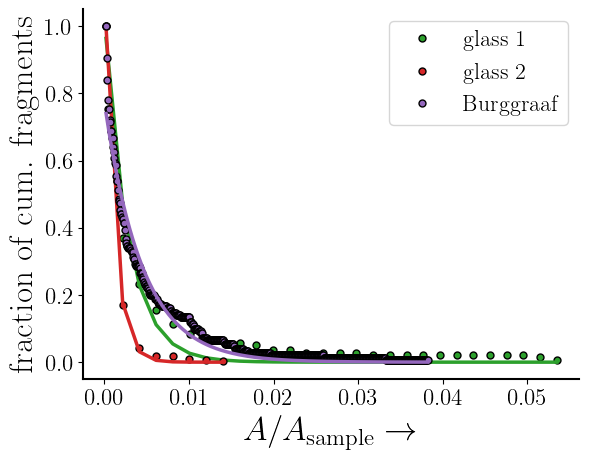

In [7]:
# literature data
data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\glass_1\analysis\area' 
with open(data_dir_path + f'/glass1_area_exp_cum_area', 'rb') as f:
    cum_area_glass1, cum_count_glass1, p_glass1, p_conv_glass1, area_glass1 = pickle.load(f)

data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\glass_2\analysis\area'
with open(data_dir_path + f'/glass2_area_exp_cum_area', 'rb') as f:
    cum_area_glass2, cum_count_glass2, p_glass2, p_conv_glass2, area_glass2 = pickle.load(f)

data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\Burggraaf\analysis\area'
with open(data_dir_path + f'/burggraaf_area_exp_cum_area', 'rb') as f:
    cum_area_burggraaf, cum_count_burggraaf, p_burggraaf, p_conv_burggraaf, area_burggraaf = pickle.load(f)

# We can separate plot and check
fig, ax = plt.subplots()
A_glass = (np.pi/4)*25.4**2
# plot the data for glass 1
ax.plot(cum_area_glass1/A_glass, cum_count_glass1/cum_count_glass1[0], color='tab:green', linestyle = 'none', markersize = 5, marker = 'o', label=r'glass 1', markeredgecolor='black')
ax.plot(cum_area_glass1/A_glass, exp_fit(cum_area_glass1, p_glass1[0], p_glass1[1]), color='tab:green')
# plot the data for glass 2
ax.plot(cum_area_glass2/A_glass, cum_count_glass2/cum_count_glass2[0], color='tab:red', linestyle = 'none', markersize = 5, marker = 'o', label=r'glass 2', markeredgecolor='black')
ax.plot(cum_area_glass2/A_glass, exp_fit(cum_area_glass2, p_glass2[0], p_glass2[1]), color='tab:red')

A_burggraaf = (np.pi/4)*135**2
# plot the data for burggraaf
ax.plot(cum_area_burggraaf/A_burggraaf, cum_count_burggraaf/cum_count_burggraaf[0], color='tab:purple', linestyle = 'none', markersize = 5, marker = 'o', label=r'Burggraaf', markeredgecolor='black')
ax.plot(cum_area_burggraaf/A_burggraaf, exp_fit(cum_area_burggraaf, p_burggraaf[0], p_burggraaf[1]), color='tab:purple')

ax.legend()
ax.set_xlabel(r'$A/A_{\rm{sample}}\rightarrow$')
ax.set_ylabel(r'fraction of cum. fragments')
# fig.savefig(r'C:\Users\vinee\OneDrive\Documents\MATLAB'+ '/exp_cum_area_literature.png', dpi=300, bbox_inches='tight')
plt.show()


<span style="color: #1E90FF;"> Since, all the individual data has been loaded in the memory, we can now collate the desired data into single plot.</span><br>

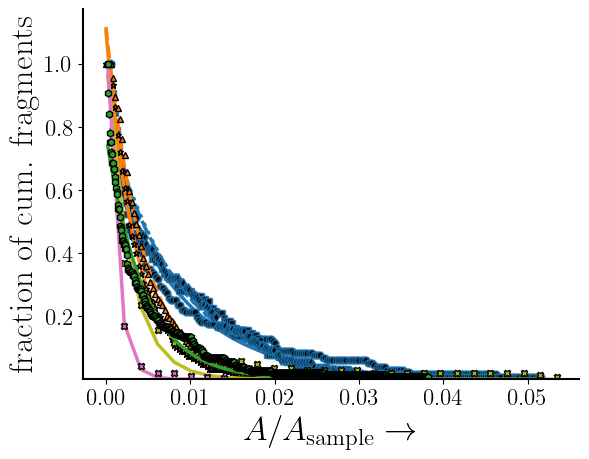

In [8]:
save_dir_path = r'C:\MyData\Stressed network work\Data\Collated plots'

fig, ax = plt.subplots()
A_num = 60*60   # non-dimensional by total area of the network

ms = 5
mec = 'black'

# varying eb
# ax.plot(cum_area_e1/A_num, exp_fit(cum_area_e1, p_e1[0], p_e1[1]), color='tab:blue', alpha = 1, linestyle='solid')
# ax.plot(cum_area_e2/A_num, exp_fit(cum_area_e2, p_e2[0], p_e2[1]), color='tab:blue', alpha = 1, linestyle='dashed')
# ax.plot(cum_area_e3/A_num, exp_fit(cum_area_e3, p_e3[0], p_e3[1]), color='tab:blue', alpha = 1, linestyle='dotted')

# ax.plot(cum_area_e1/A_num, cum_count_e1/cum_count_e1[0], linestyle='none', markersize=ms, marker='o',
#     markerfacecolor = 'tab:blue', markeredgecolor = 'black', label=r'$\epsilon_b = 0.03$', alpha=0.8)
# ax.plot(cum_area_e2/A_num, cum_count_e2/cum_count_e2[0], linestyle = 'none', markersize = ms, marker = 's', 
#         color='tab:blue', markeredgecolor = 'black', label = r'$\epsilon_b = 0.035$', alpha = 0.8)
# ax.plot(cum_area_e3/A_num, cum_count_e3/cum_count_e3[0], linestyle = 'none', markersize = ms, marker = 'd', 
#         markerfacecolor='tab:blue', markeredgecolor = 'black', label = r'$\epsilon_b = 0.04$', alpha = 0.8)


# varying m
ax.plot(cum_area_m2/A_num, exp_fit(cum_area_m2, p_m2[0], p_m2[1]), color='tab:blue', alpha=1, linestyle='solid')
ax.plot(cum_area_m3/A_num, exp_fit(cum_area_m3, p_m3[0], p_m3[1]), color='tab:blue', alpha=1, linestyle='dashed')
ax.plot(cum_area_m5/A_num, exp_fit(cum_area_m5, p_m5[0], p_m5[1]), color='tab:blue', alpha=1, linestyle='dotted')

ax.plot(cum_area_m2/A_num, cum_count_m2/cum_count_m2[0], linestyle='none', markersize=ms, marker='o', markeredgecolor='tab:blue', markerfacecolor = 'black', label=r'$m = 2$', alpha=0.8)
ax.plot(cum_area_m3/A_num, cum_count_m3/cum_count_m3[0], linestyle='none', markersize=ms, marker='s', markeredgecolor='tab:blue', markerfacecolor = 'black', label=r'$m = 3$', alpha=0.8)
ax.plot(cum_area_m5/A_num, cum_count_m5/cum_count_m5[0], linestyle='none', markersize=ms, marker='d', markeredgecolor='tab:blue', markerfacecolor = 'black', label=r'$m = 5$', alpha=0.8)


# our experiment data
A0 = 60*60
# ax.errorbar(cum_area123/A0, cum_count123/cum_count123[0], yerr=cum_count123_std/cum_count123[0], ecolor='tab:orange', capsize=5,
#             linestyle='none', marker='*', markersize=ms, color='tab:orange', label=r'$v = 34$ m/s', mec=mec)
# ax.errorbar(cum_area678/A0, cum_count678/cum_count678[0], yerr=cum_count678_std/cum_count678[0], ecolor='tab:orange', capsize=5,
#             linestyle='none', marker='^', markersize=ms, color='tab:orange', label=r'$v = 20$ m/s', mec=mec)

ax.plot(cum_area123/A0, exp_fit(cum_area123, p1[0], p1[1]), color='tab:orange', linestyle='solid')
ax.plot(cum_area678/A0, exp_fit(cum_area678, p2[0], p2[1]), color='tab:orange', linestyle='dashed')
ax.plot(cum_area123/A0, cum_count123/cum_count123[0], color='tab:orange', linestyle='none', markersize=ms, marker='*', mec=mec)
ax.plot(cum_area678/A0, cum_count678/cum_count678[0], color='tab:orange', linestyle='none', markersize=ms, marker='^', mec=mec)

# literature data
A_glass = (np.pi/4)*25.4**2
# plot the data for glass 1
ax.plot(cum_area_glass1/A_glass, exp_fit(cum_area_glass1, p_glass1[0], p_glass1[1]), color='tab:olive')
ax.plot(cum_area_glass1/A_glass, cum_count_glass1/cum_count_glass1[0], color='tab:olive', linestyle='none', markersize=ms, marker='X', label=r'glass 1', mec=mec)

# plot the data for glass 2
ax.plot(cum_area_glass2/A_glass, exp_fit(cum_area_glass2, p_glass2[0], p_glass2[1]), color='tab:pink')
ax.plot(cum_area_glass2/A_glass, cum_count_glass2/cum_count_glass2[0], color='tab:pink', linestyle='none', markersize=ms, marker='X', label=r'glass 2', mec=mec)


A_burggraaf = (np.pi/4)*135**2
# plot the data for burggraaf
ax.plot(cum_area_burggraaf/A_burggraaf, exp_fit(cum_area_burggraaf, p_burggraaf[0], p_burggraaf[1]), color='tab:green')
ax.plot(cum_area_burggraaf/A_burggraaf, cum_count_burggraaf/cum_count_burggraaf[0], color='tab:green', linestyle='none', markersize=ms, marker='h', label=r'Burggraaf', mec=mec)


ax.set_xlabel(r'$A/A_{\rm{sample}}\rightarrow$')
ax.set_ylabel(r'fraction of cum. fragments')
ax.set_ylim(bottom=1e-3)
# ax.set_yscale('log')    # Change to log scale for better visibility of small values
# ax.legend()
fig.savefig(save_dir_path+ '/vary_m_literature_impact.png', dpi=300, bbox_inches='tight')
plt.show()